# Anything behind "#" is comments. 

# Each cell can be executed by pressing "shift"+"return" (or "shift"+"enter")

In [1]:
# import system modules
import sys
import datetime, time, timeit

# import basic modules
import numpy
import scipy
from scipy import integrate
from matplotlib import pyplot

pyplot.rcParams['ps.useafm'] = True
pyplot.rcParams['pdf.use14corefonts'] = True
pyplot.rcParams['text.usetex'] = True


## (1) simple functions

In [2]:
# simply calculate 10x35
10*35

350

In [3]:
# PI
numpy.pi

3.141592653589793

In [4]:
# 
4*numpy.pi

12.566370614359172

In [5]:
PI = numpy.pi

a = 4*PI

# show the result
print(a)

12.5663706144


In [6]:
#sin (PI) should be zero, and it is indeed (almost) zero
numpy.sin(numpy.pi)

1.2246467991473532e-16

In [7]:
#cos (PI) should be -1, and it is indeed -1.
numpy.cos(numpy.pi)

-1.0

## (2) define function

In [8]:
def deg_to_radian(degree):
    radian = degree/180.*numpy.pi
    return radian
    

In [9]:
numpy.cos((deg_to_radian(180)))

-1.0

## (3) plot function

In [10]:
# equally spaced 51 values between (-180 deg) and (540 deg):
list_x = numpy.linspace(-180, 540, 51)

# cos-value for list_x
list_y = numpy.cos((deg_to_radian(list_x)))

In [11]:
list_x

array([-180. , -165.6, -151.2, -136.8, -122.4, -108. ,  -93.6,  -79.2,
        -64.8,  -50.4,  -36. ,  -21.6,   -7.2,    7.2,   21.6,   36. ,
         50.4,   64.8,   79.2,   93.6,  108. ,  122.4,  136.8,  151.2,
        165.6,  180. ,  194.4,  208.8,  223.2,  237.6,  252. ,  266.4,
        280.8,  295.2,  309.6,  324. ,  338.4,  352.8,  367.2,  381.6,
        396. ,  410.4,  424.8,  439.2,  453.6,  468. ,  482.4,  496.8,
        511.2,  525.6,  540. ])

In [12]:
list_y

array([-1.        , -0.96858316, -0.87630668, -0.72896863, -0.53582679,
       -0.30901699, -0.06279052,  0.18738131,  0.42577929,  0.63742399,
        0.80901699,  0.92977649,  0.9921147 ,  0.9921147 ,  0.92977649,
        0.80901699,  0.63742399,  0.42577929,  0.18738131, -0.06279052,
       -0.30901699, -0.53582679, -0.72896863, -0.87630668, -0.96858316,
       -1.        , -0.96858316, -0.87630668, -0.72896863, -0.53582679,
       -0.30901699, -0.06279052,  0.18738131,  0.42577929,  0.63742399,
        0.80901699,  0.92977649,  0.9921147 ,  0.9921147 ,  0.92977649,
        0.80901699,  0.63742399,  0.42577929,  0.18738131, -0.06279052,
       -0.30901699, -0.53582679, -0.72896863, -0.87630668, -0.96858316,
       -1.        ])

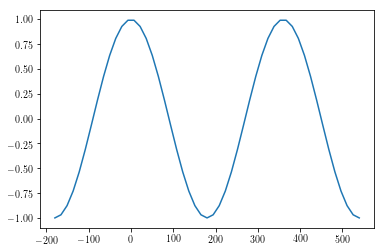

In [13]:
pyplot.plot(list_x, list_y, '-')
pyplot.show()

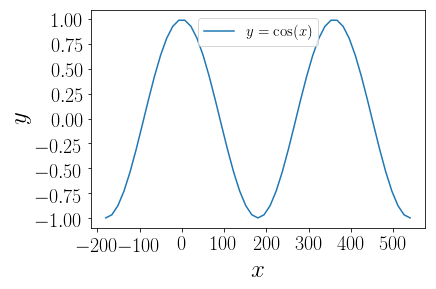

In [14]:
# decorating figure
pyplot.plot(list_x, list_y, '-', label=r'$y = \cos (x)$')
pyplot.xlabel(r'$x$',fontsize=25)
pyplot.ylabel(r'$y$',fontsize=25)
pyplot.xticks(fontsize=20)
pyplot.yticks(fontsize=20)

pyplot.legend(fontsize=15)

pyplot.savefig('cos_x.png')

pyplot.show()

## (4) Integration 

In [15]:
def gauss_func(x):
    return 1./numpy.sqrt(2.*numpy.pi)*numpy.exp(-0.5*x*x)

    

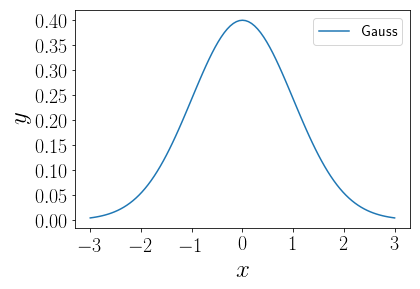

In [16]:
list_x2 = numpy.linspace(-3,3,101)

pyplot.plot(list_x2, gauss_func(list_x2), '-', label='Gauss')
pyplot.xlabel(r'$x$',fontsize=25)
pyplot.ylabel(r'$y$',fontsize=25)
pyplot.xticks(fontsize=20)
pyplot.yticks(fontsize=20)

pyplot.legend(fontsize=15)
pyplot.show()

In [17]:
# integration of gaussian function at -1<x<1 

# The result is stored in "result2"
result2 = scipy.integrate.quad(gauss_func, -1, 1)

In [18]:
# Show the result:
print("I show the contents of result1:")
print(result2)
print(' ')

print("The first element is the integrated value. Note that index begins from zero.")
print("result1[0]:")
print(result2[0])
print(' ')

print("The second element is the integrated value.")
print("result1[1]:")
print(result2[1])


I show the contents of result1:
(0.682689492137086, 7.579375928402476e-15)
 
The first element is the integrated value. Note that index begins from zero.
result1[0]:
0.682689492137
 
The second element is the integrated value.
result1[1]:
7.5793759284e-15


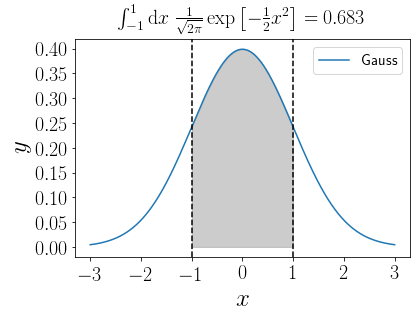

In [19]:
list_x2 = numpy.linspace(-3,3,501)
gauss_2 = gauss_func(list_x2)
gauss_bottom_2 = list_x2*0.
filter_x2 = (-1<list_x2) & (list_x2<1)

pyplot.plot(list_x2, gauss_2, '-', label='Gauss')
pyplot.axvline(x=-1, linestyle='dashed', c ='k')
pyplot.axvline(x=1,  linestyle='dashed', c ='k')

pyplot.fill_between(list_x2[filter_x2], 
                    gauss_2[filter_x2],
                    gauss_bottom_2[filter_x2],
                    color='grey', alpha=0.4)

pyplot.xlabel(r'$x$',fontsize=25)
pyplot.ylabel(r'$y$',fontsize=25)
pyplot.xticks(fontsize=20)
pyplot.yticks(fontsize=20)

fig_title = r'$\int_{-1}^{1} \mathrm{d}x \; \frac{1}{\sqrt{2 \pi}} \exp \left[ - \frac{1}{2} x^2 \right] = %.3lf$' % (result2[0])
pyplot.title(fig_title, fontsize=20)


pyplot.legend(fontsize=15)

pyplot.show()

## (4-1) Integration can be done even at infinitely large range(!)

In [20]:
# integration of gaussian function at -infinity<x<infinity

# The result is stored in "result3"
result3 = scipy.integrate.quad(gauss_func, -numpy.inf, numpy.inf)
print(result3)



(0.9999999999999997, 1.017819145094224e-08)


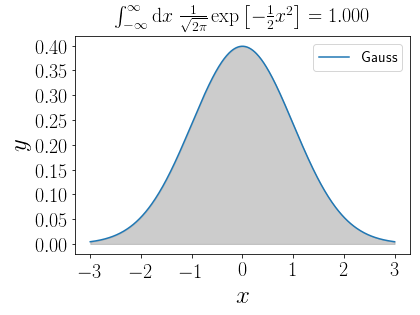

In [21]:
list_x3 = numpy.linspace(-3,3,501)
gauss_3 = gauss_func(list_x2)
gauss_bottom_3 = list_x3*0.

pyplot.plot(list_x3, gauss_3, '-', label='Gauss')
#pyplot.axvline(x=-1, linestyle='dashed', c ='k')
#pyplot.axvline(x=1,  linestyle='dashed', c ='k')

pyplot.fill_between(list_x3, 
                    gauss_3,
                    gauss_bottom_3,
                    color='grey', alpha=0.4)

pyplot.xlabel(r'$x$',fontsize=25)
pyplot.ylabel(r'$y$',fontsize=25)
pyplot.xticks(fontsize=20)
pyplot.yticks(fontsize=20)

fig_title = r'$\int_{-\infty}^{\infty} \mathrm{d}x \; \frac{1}{\sqrt{2 \pi}} \exp \left[ - \frac{1}{2} x^2 \right] = %.3lf$' % (result3[0])
pyplot.title(fig_title, fontsize=20)


pyplot.legend(fontsize=15)

pyplot.show()

## (5) Statistics

In [22]:
# Given N people. What is the probability that at least a pair of person have an identical birthday. 

# set random seed to be 123.
numpy.random.seed(123)

N_trial = 10000

list_yes = numpy.zeros(N_trial)
N=20

for i in range(N_trial):
    list_birth = numpy.random.randint(low=0, high=367, size=N)
    list_birth_unique = numpy.unique(list_birth)
    
    len_unique = len(list_birth_unique)
    
    if (len_unique<N):
        list_yes[i]=1.

print(numpy.sum(list_yes)/float(N_trial))


0.4076


In [23]:

# set random seed to be 123.

N_trial = 1000

max_N = 367
list_frac = numpy.zeros(max_N)



def frac_pair(N):
    numpy.random.seed(123)

    list_yes = numpy.zeros(N_trial)

    for i in range(N_trial):
        list_birth = numpy.random.randint(low=0, high=367, size=N)
        list_birth_unique = numpy.unique(list_birth)

        len_unique = len(list_birth_unique)

        if (len_unique<N):
            list_yes[i]=1.
    
    frac = numpy.sum(list_yes)/float(N_trial)
    return frac


for N in range(max_N):
    list_frac[N] = frac_pair(N)
    if (N%30==0):
        print(N)

0
30
60
90
120
150
180
210
240
270
300
330
360


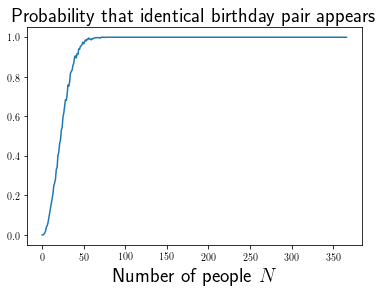

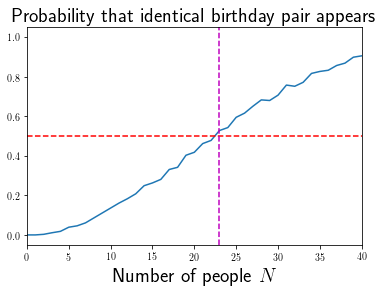

In [24]:
pyplot.plot(list_frac, '-')
pyplot.xlabel(r'Number of people $N$', fontsize=20)
pyplot.title(r'Probability that identical birthday pair appears', fontsize=20)

pyplot.show()

pyplot.plot(list_frac, '-')
pyplot.xlim([0,40])
pyplot.axhline(y=0.5, linestyle='dashed', color='r')
pyplot.axvline(x=23, linestyle='dashed', color='m')
pyplot.xlabel(r'Number of people $N$', fontsize=20)
pyplot.title(r'Probability that identical birthday pair appears', fontsize=20)

pyplot.show()



## (6) Vectorization and speed-up (Numpy)

In [25]:
list_array_example = numpy.array([1., 3., 5., 7.])

list_array_example**2

array([ 1.,  9., 25., 49.])

In [26]:
# Vectorize
list_array = numpy.arange(1000)


N_loop = 10000


# for-loop
list_array2 = numpy.zeros(len(list_array))
start2 = timeit.default_timer()#datetime.datetime.now()
for i in range(N_loop):
    for i in range(len(list_array)):
        list_array2[i]=list_array[i]**2
end2 = timeit.default_timer()#datetime.datetime.now()

time2 = end2-start2
print(time2) 

#print(list_array2)


# vectorization
list_array3 = numpy.zeros(len(list_array))

start3 = timeit.default_timer()#datetime.datetime.now()
for i in range(N_loop):
    list_array3=list_array**2
end3 = timeit.default_timer()#datetime.datetime.now()

time3 = end3-start3
print(time3)

#print(list_array3)

print('Vectorization accelerates the calculation by a factor of %.3lf' % (time2/time3))

12.2362880707
0.0284521579742
Vectorization accelerates the calculation by a factor of 430.065
